# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net_my import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [5]:
X.shape

(5, 4)

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [6]:
scores = net.loss(X)

print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

#check if it is OK 
assert np.abs(scores - correct_scores).sum() < 1e-7

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [7]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

assert np.sum(np.abs(loss - correct_loss)) < 1e-12

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [8]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 1.276034e-10
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555471e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

In [ ]:
import gc
gc.collect()

Final training loss:  0.017149607938732093


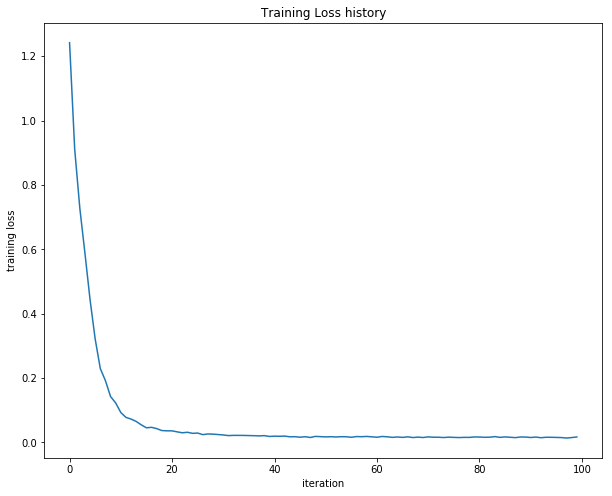

In [10]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [11]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [17]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302976
iteration 100 / 1000: loss 2.302683
iteration 200 / 1000: loss 2.300064
iteration 300 / 1000: loss 2.277991
iteration 400 / 1000: loss 2.204380
iteration 500 / 1000: loss 2.145056
iteration 600 / 1000: loss 2.147779
iteration 700 / 1000: loss 2.012543
iteration 800 / 1000: loss 2.120940
iteration 900 / 1000: loss 2.118416
Validation accuracy:  0.265


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

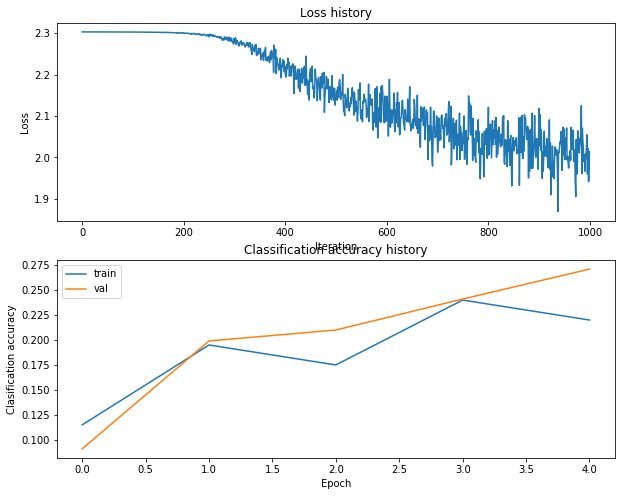

In [18]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

print()

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

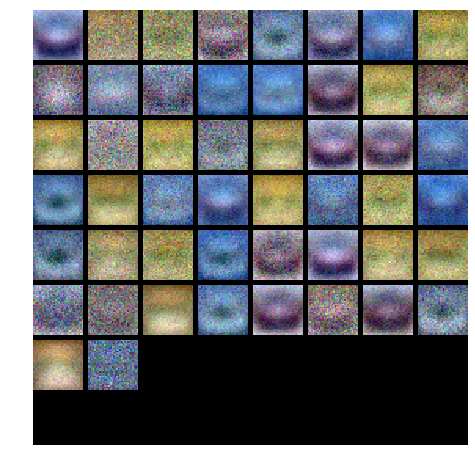

In [19]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [22]:
from sklearn.decomposition import PCA

In [28]:
from tqdm import tqdm_notebook

In [ ]:
pca = PCA(n_)

In [29]:
best_net = None # store the best model into this 

input_size = 3072
hidden_size = 50
num_classes = 10

num_iters = 2000
batch_size = 250

learning_rate = np.linspace(1e-5, 1e-3, 5)
regularization = np.linspace(1e-6, 1e-4, 5)

net_my = TwoLayerNet(input_size, hidden_size, num_classes)

for lr in tqdm_notebook(learning_rate):
    for reg in tqdm_notebook(regularization):
        cnn_my = net_my.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
            learning_rate=lr, learning_rate_decay=0.95, reg=reg, verbose=True)
        
        train_pred = net_my.predict(X_train)
        train_acc = (train_pred == y_train).mean()
        
        val_predict = net_my.predict(X_val)
        val_acc = (net_my.predict(X_val) == y_val).mean()
        
        print('learning rate: {}, regularization: {}, train acc: {}, val acc: {}'.format(lr, reg, \
                                                                                         train_acc, val_acc))

iteration 0 / 2000: loss 2.302587
iteration 100 / 2000: loss 2.302553
iteration 200 / 2000: loss 2.302543
iteration 300 / 2000: loss 2.302526
iteration 400 / 2000: loss 2.302497
iteration 500 / 2000: loss 2.302471
iteration 600 / 2000: loss 2.302435
iteration 700 / 2000: loss 2.302413
iteration 800 / 2000: loss 2.302381
iteration 900 / 2000: loss 2.302306
iteration 1000 / 2000: loss 2.302222
iteration 1100 / 2000: loss 2.302214
iteration 1200 / 2000: loss 2.302240
iteration 1300 / 2000: loss 2.302063
iteration 1400 / 2000: loss 2.301995
iteration 1500 / 2000: loss 2.301850
iteration 1600 / 2000: loss 2.301709
iteration 1700 / 2000: loss 2.301733
iteration 1800 / 2000: loss 2.301477
iteration 1900 / 2000: loss 2.301034
learning rate 1e-05, regularization 1e-06, train acc 0.19618367346938775, val acc0.202
iteration 0 / 2000: loss 2.300850
iteration 100 / 2000: loss 2.300134
iteration 200 / 2000: loss 2.299673
iteration 300 / 2000: loss 2.299141
iteration 400 / 2000: loss 2.298020
iterati

iteration 0 / 2000: loss 1.865787
iteration 100 / 2000: loss 1.928103
iteration 200 / 2000: loss 1.848366
iteration 300 / 2000: loss 1.760979
iteration 400 / 2000: loss 1.800819
iteration 500 / 2000: loss 1.721413
iteration 600 / 2000: loss 1.759010
iteration 700 / 2000: loss 1.683233
iteration 800 / 2000: loss 1.818067
iteration 900 / 2000: loss 1.595236
iteration 1000 / 2000: loss 1.629988
iteration 1100 / 2000: loss 1.609231
iteration 1200 / 2000: loss 1.648845
iteration 1300 / 2000: loss 1.660268
iteration 1400 / 2000: loss 1.579374
iteration 1500 / 2000: loss 1.484804
iteration 1600 / 2000: loss 1.633495
iteration 1700 / 2000: loss 1.547780
iteration 1800 / 2000: loss 1.508402
iteration 1900 / 2000: loss 1.495716
learning rate 0.0002575, regularization 1e-06, train acc 0.4604489795918367, val acc0.448
iteration 0 / 2000: loss 1.401208
iteration 100 / 2000: loss 1.607068
iteration 200 / 2000: loss 1.511322
iteration 300 / 2000: loss 1.479008
iteration 400 / 2000: loss 1.545264
iter

iteration 0 / 2000: loss 1.265112
iteration 100 / 2000: loss 1.219633
iteration 200 / 2000: loss 1.200399
iteration 300 / 2000: loss 1.232823
iteration 400 / 2000: loss 1.213023
iteration 500 / 2000: loss 1.240174
iteration 600 / 2000: loss 1.087506
iteration 700 / 2000: loss 1.218552
iteration 800 / 2000: loss 1.115897
iteration 900 / 2000: loss 1.222679
iteration 1000 / 2000: loss 1.211552
iteration 1100 / 2000: loss 1.280794
iteration 1200 / 2000: loss 1.169137
iteration 1300 / 2000: loss 1.131244
iteration 1400 / 2000: loss 1.030501
iteration 1500 / 2000: loss 1.046463
iteration 1600 / 2000: loss 1.164643
iteration 1700 / 2000: loss 1.196595
iteration 1800 / 2000: loss 1.158971
iteration 1900 / 2000: loss 1.206720
learning rate 0.000505, regularization 1e-06, train acc 0.603326530612245, val acc0.504
iteration 0 / 2000: loss 1.241700
iteration 100 / 2000: loss 1.313057
iteration 200 / 2000: loss 1.181304
iteration 300 / 2000: loss 1.067863
iteration 400 / 2000: loss 1.072053
iterat

iteration 0 / 2000: loss 0.966117
iteration 100 / 2000: loss 1.412577
iteration 200 / 2000: loss 1.231611
iteration 300 / 2000: loss 0.937655
iteration 400 / 2000: loss 0.978968
iteration 500 / 2000: loss 1.199674
iteration 600 / 2000: loss 1.057215
iteration 700 / 2000: loss 1.095297
iteration 800 / 2000: loss 1.040269
iteration 900 / 2000: loss 1.024495
iteration 1000 / 2000: loss 1.011791
iteration 1100 / 2000: loss 1.077889
iteration 1200 / 2000: loss 0.954451
iteration 1300 / 2000: loss 0.949907
iteration 1400 / 2000: loss 0.959576
iteration 1500 / 2000: loss 0.998591
iteration 1600 / 2000: loss 0.967532
iteration 1700 / 2000: loss 0.970009
iteration 1800 / 2000: loss 0.927535
iteration 1900 / 2000: loss 0.840996
learning rate 0.0007525, regularization 1e-06, train acc 0.6729387755102041, val acc0.494
iteration 0 / 2000: loss 0.883449
iteration 100 / 2000: loss 1.127681
iteration 200 / 2000: loss 1.168190
iteration 300 / 2000: loss 1.025595
iteration 400 / 2000: loss 0.958857
iter

iteration 0 / 2000: loss 0.958264
iteration 100 / 2000: loss 1.256312
iteration 200 / 2000: loss 0.951835
iteration 300 / 2000: loss 0.868722
iteration 400 / 2000: loss 0.996039
iteration 500 / 2000: loss 0.877870
iteration 600 / 2000: loss 1.041817
iteration 700 / 2000: loss 1.002164
iteration 800 / 2000: loss 1.027226
iteration 900 / 2000: loss 0.868096
iteration 1000 / 2000: loss 0.873525
iteration 1100 / 2000: loss 0.992315
iteration 1200 / 2000: loss 0.930291
iteration 1300 / 2000: loss 1.044831
iteration 1400 / 2000: loss 0.885148
iteration 1500 / 2000: loss 0.991837
iteration 1600 / 2000: loss 0.946169
iteration 1700 / 2000: loss 0.823211
iteration 1800 / 2000: loss 0.912994
iteration 1900 / 2000: loss 0.864505
learning rate 0.001, regularization 1e-06, train acc 0.705469387755102, val acc0.498
iteration 0 / 2000: loss 0.870253
iteration 100 / 2000: loss 1.021723
iteration 200 / 2000: loss 1.050793
iteration 300 / 2000: loss 0.807842
iteration 400 / 2000: loss 0.900093
iteration

In [37]:
# learning rate 0.0002575, regularization 0.0001, train acc 0.5909387755102041, val acc0.519


input_size = 3072
hidden_size = 50
num_classes = 10

num_iters = 2000
batch_size = 250

learning_rate = 0.001
regularization = 0.0001

net_my_best = TwoLayerNet(input_size, hidden_size, num_classes)

cnn_my_best = net_my_best.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
    learning_rate=learning_rate, learning_rate_decay=0.95, reg=regularization, verbose=True)

train_pred = net_my_best.predict(X_train)
train_acc = (train_pred == y_train).mean()

val_predict = net_my_best.predict(X_val)
val_acc = (net_my_best.predict(X_val) == y_val).mean()

print(' train acc: {}, val acc: {}'.format(train_acc, val_acc))

iteration 0 / 2000: loss 2.302577
iteration 100 / 2000: loss 1.846878
iteration 200 / 2000: loss 1.869127
iteration 300 / 2000: loss 1.784029
iteration 400 / 2000: loss 1.590231
iteration 500 / 2000: loss 1.537139
iteration 600 / 2000: loss 1.494231
iteration 700 / 2000: loss 1.562412
iteration 800 / 2000: loss 1.392523
iteration 900 / 2000: loss 1.424853
iteration 1000 / 2000: loss 1.371032
iteration 1100 / 2000: loss 1.519663
iteration 1200 / 2000: loss 1.442564
iteration 1300 / 2000: loss 1.290242
iteration 1400 / 2000: loss 1.286390
iteration 1500 / 2000: loss 1.338229
iteration 1600 / 2000: loss 1.345286
iteration 1700 / 2000: loss 1.354062
iteration 1800 / 2000: loss 1.411135
iteration 1900 / 2000: loss 1.271701
 train acc: 0.5386122448979592, val acc: 0.493


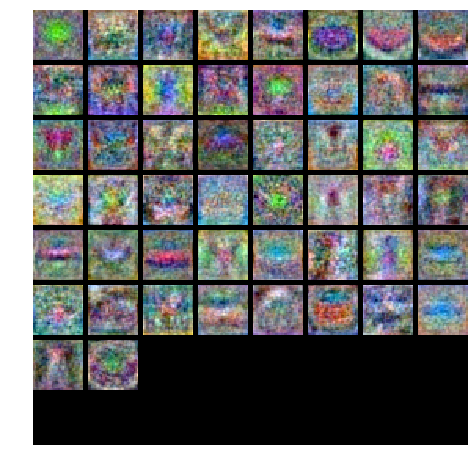

In [38]:
# visualize the weights of the best network
show_net_weights(net_my_best)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [39]:
test_acc = (net_my_best.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.479


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1. 

*Your explanation:*